In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("rider_order_compatibility_large.csv")

In [3]:
df.head()

,working_hours_today,orders_completed_today,avg_delivery_distance,past_delay_count,rider_rating,order_distance,area_difficulty,is_peak_hour,weather_condition,is_risky
0,7,18,7.74,7,3.8,6.70,3,1,0,0
1,4,6,5.00,5,4.8,14.12,3,1,0,0
2,11,18,4.60,3,4.3,6.28,2,1,0,0
3,8,19,4.75,2,3.2,10.30,1,1,1,0
4,5,22,3.25,2,4.9,4.57,1,1,0,0


In [4]:
#SHape
df.shape

(2000, 10)

In [5]:
df.columns

Index(['working_hours_today', 'orders_completed_today',
       'avg_delivery_distance', 'past_delay_count', 'rider_rating',
       'order_distance', 'area_difficulty', 'is_peak_hour',
       'weather_condition', 'is_risky'],
      dtype='object')

In [6]:
df.dtypes

working_hours_today         int64
orders_completed_today      int64
avg_delivery_distance     float64
past_delay_count            int64
rider_rating              float64
order_distance            float64
area_difficulty             int64
is_peak_hour                int64
weather_condition           int64
is_risky                    int64
dtype: object

In [7]:
df.isnull().sum()

working_hours_today       0
orders_completed_today    0
avg_delivery_distance     0
past_delay_count          0
rider_rating              0
order_distance            0
area_difficulty           0
is_peak_hour              0
weather_condition         0
is_risky                  0
dtype: int64

In [8]:
#EDA
df.describe()

,working_hours_today,orders_completed_today,avg_delivery_distance,past_delay_count,rider_rating,order_distance,area_difficulty,is_peak_hour,weather_condition,is_risky
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.465500,12.581000,4.968455,4.493500,3.978100,7.886735,2.011000,0.491000,0.508500,0.056500
std,3.500419,7.006424,1.721412,2.908812,0.574243,3.956108,0.808211,0.500044,0.500053,0.230942
min,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,3.480000,2.000000,3.500000,4.530000,1.000000,0.000000,0.000000,0.000000
50%,6.000000,13.000000,4.985000,4.000000,4.000000,7.905000,2.000000,0.000000,1.000000,0.000000
75%,10.000000,19.000000,6.430000,7.000000,4.500000,11.225000,3.000000,1.000000,1.000000,0.000000
max,12.000000,24.000000,8.000000,9.000000,5.000000,14.990000,3.000000,1.000000,1.000000,1.000000


In [9]:
df['is_risky'].value_counts()

is_risky
0    1887
1     113
Name: count, dtype: int64

In [10]:
df["is_risky"].value_counts(normalize=True)*100

is_risky
0    94.35
1     5.65
Name: proportion, dtype: float64

In [11]:
df.groupby("is_risky")["working_hours_today"].mean()

is_risky
0     6.189189
1    11.079646
Name: working_hours_today, dtype: float64

In [12]:
df.groupby("is_risky")["order_distance"].mean()

is_risky
0     7.685639
1    11.244867
Name: order_distance, dtype: float64

In [13]:
#lets create graph
import matplotlib.pyplot as plt

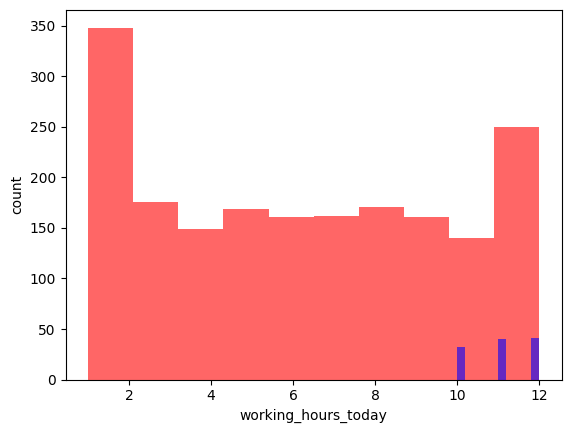

In [14]:
plt.hist(df[df["is_risky"]==0]["working_hours_today"],color="red",alpha=0.6,label="safe")
plt.hist(df[df["is_risky"]==1]["working_hours_today"],color="blue",alpha=0.6,label="risky")
plt.xlabel("working_hours_today")
plt.ylabel("count")
plt.show()


In [15]:
df["fatigue_score"]=(
    df["working_hours_today"]*0.4+df["orders_completed_today"]*0.3+df["past_delay_count"])

In [16]:
df[["working_hours_today",
    "orders_completed_today",
    "past_delay_count",
    "fatigue_score"]].head()


,working_hours_today,orders_completed_today,past_delay_count,fatigue_score
0,7,18,7,15.2
1,4,6,5,8.4
2,11,18,3,12.8
3,8,19,2,10.9
4,5,22,2,10.6


In [17]:
df.groupby("is_risky")["fatigue_score"].mean()

is_risky
0    10.745416
1    12.667257
Name: fatigue_score, dtype: float64

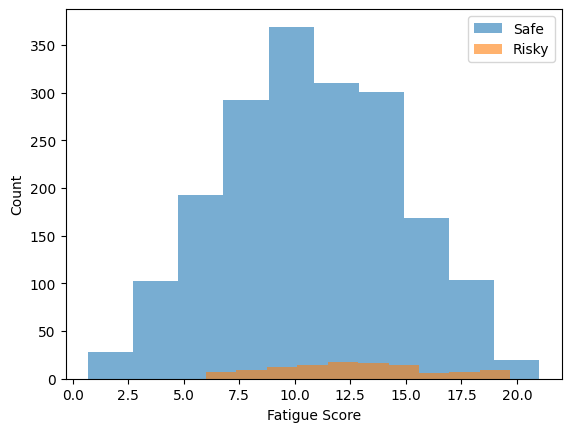

In [18]:
#fatigue score graph
import matplotlib.pyplot as plt

plt.hist(df[df["is_risky"] == 0]["fatigue_score"],
         alpha=0.6, label="Safe")

plt.hist(df[df["is_risky"] == 1]["fatigue_score"],
         alpha=0.6, label="Risky")

plt.xlabel("Fatigue Score")
plt.ylabel("Count")
plt.legend()
plt.show()


In [19]:
df.groupby("is_risky")["fatigue_score"].describe()


,count,mean,std,min,25%,50%,75%,max
is_risky,,,,,,,,
0,1887.0,10.745416,3.939910,0.7,8.0,10.6,13.6,21.0
1,113.0,12.667257,3.486849,6.0,10.3,12.2,15.0,19.7


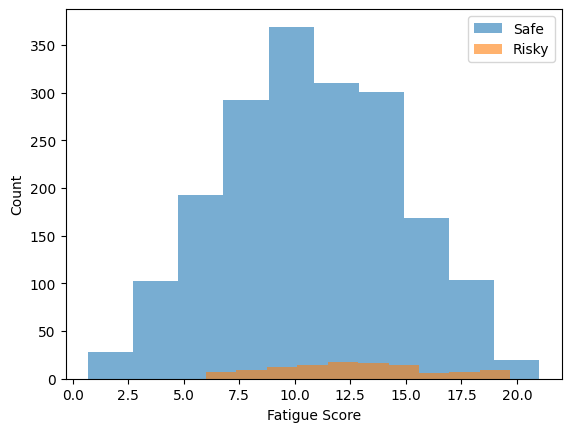

In [20]:
plt.hist(df[df["is_risky"]==0]["fatigue_score"], alpha=0.6, label="Safe")
plt.hist(df[df["is_risky"]==1]["fatigue_score"], alpha=0.6, label="Risky")
plt.xlabel("Fatigue Score")
plt.ylabel("Count")
plt.legend()
plt.show()


In [21]:
#lets create feature X and target y
X = df[
    [
        "fatigue_score",
        "order_distance",
        "area_difficulty",
        "is_peak_hour",
        "weather_condition"
    ]
]

y = df["is_risky"]



In [22]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)


In [ ]:
# Model evaluation

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9525

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[380,   2],
       [ 17,   1]], dtype=int64)

In [ ]:
#Precision, Recall, F1-score

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       382
           1       0.33      0.06      0.10        18

    accuracy                           0.95       400
   macro avg       0.65      0.53      0.54       400
weighted avg       0.93      0.95      0.94       400



In [ ]:
#Probability Output (predict_proba)

In [28]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob[:10]


array([0.01349729, 0.02228548, 0.00073624, 0.00077736, 0.00214833,
       0.01184717, 0.00230522, 0.0007198 , 0.003194  , 0.00024618])

In [29]:
#Threshold Tuning 
custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       382
           1       0.60      0.33      0.43        18

    accuracy                           0.96       400
   macro avg       0.78      0.66      0.70       400
weighted avg       0.95      0.96      0.95       400



In [ ]:
#Model Explanation (Coefficients)


In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df


In [30]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [31]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
